In [8]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from sklearn import datasets, decomposition

In [9]:
np.random.seed(5)

iris = datasets.load_iris()

x = iris.data
y = iris.target

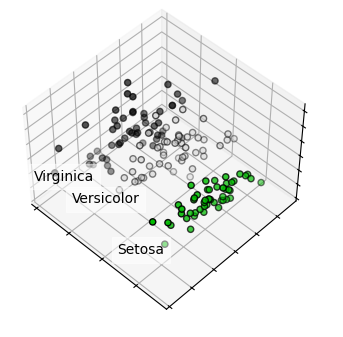

In [10]:
# Create figure and clear previous plots
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

# Create 3D plot with specified elevation and azimuth
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

# Clear axis
plt.cla()

# Apply PCA to reduce to 3 components
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)

# Add text annotations for each class
for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
    ax.text3D(
        x[y == label, 0].mean(),
        x[y == label, 1].mean() + 1.5,
        x[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha=0.5, edgecolor='w', facecolor='w'),
    )

# Convert y to numpy array and apply np.choose with astype
y = np.array(y)
y = np.choose(y, np.array([1, 2, 0])).astype(float)

# Scatter plot
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

# Remove tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Show plot
plt.show()
